In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

In [4]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (вес/(рост)**2)

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

Предварительно вы можете провести небольшой разведывательный анализ: посмотреть на распределения признаков и оценить их взаимосвязь с признаком наличия диабета.

In [5]:
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               778 non-null    int64   
 1   Glucose                   778 non-null    int64   
 2   BloodPressure             778 non-null    int64   
 3   SkinThickness             778 non-null    int64   
 4   Insulin                   778 non-null    int64   
 5   BMI                       778 non-null    float64 
 6   DiabetesPedigreeFunction  778 non-null    float64 
 7   Age                       778 non-null    int64   
 8   Outcome                   778 non-null    category
 9   Gender                    778 non-null    object  
dtypes: category(1), float64(2), int64(6), object(1)
memory usage: 55.7+ KB


<Axes: xlabel='BloodPressure', ylabel='Outcome'>

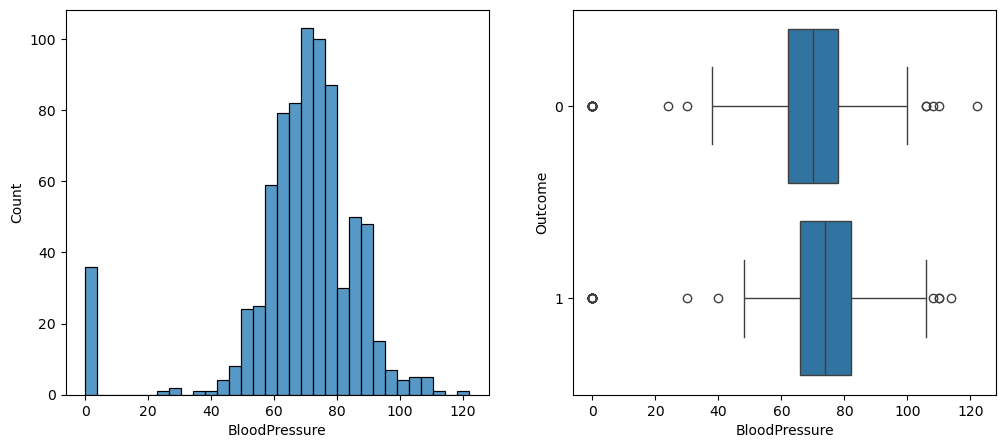

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

name_param = 'BloodPressure'

sns.histplot(diabetes,
             x=name_param,
             ax=axes[0]);

sns.boxplot(diabetes,
            x=name_param,
            y='Outcome')

In [7]:
# Задание 8.1
# Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. 
# Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

diabet_dedupped = diabetes.drop_duplicates(subset=diabetes.columns)
print(f'Результирующее число записей: {diabet_dedupped.shape[0]}')

Результирующее число записей: 768


In [8]:
# Задание 8.2
# Далее найдите все неинформативные признаки в данных и избавьтесь от них. 
# В качестве порога информативности возьмите 0.95: удалите все признаки, 
# для которых 95 % значений повторяются или 95 % записей уникальны. 
# В ответ запишите имена признаков, которые вы нашли (без кавычек).

low_information_cols = [] 

#цикл по всем столбцам
for col in diabet_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabet_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabet_dedupped[col].nunique() / diabet_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [9]:
information_diabet = diabet_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diabet.shape[1]}')

Результирующее число признаков: 9


In [10]:
def NullToNan(p_value):
    if p_value == 0:
        return np.nan
    else: 
        return p_value

In [11]:
information_diabet['Glucose'] = information_diabet['Glucose'].apply(NullToNan)
information_diabet['BloodPressure'] = information_diabet['BloodPressure'].apply(NullToNan)
information_diabet['SkinThickness'] = information_diabet['SkinThickness'].apply(NullToNan)
information_diabet['Insulin'] = information_diabet['Insulin'].apply(NullToNan)
information_diabet['BMI'] = information_diabet['BMI'].apply(NullToNan)

In [12]:
display(information_diabet)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [13]:
cols_null_percent = round(information_diabet.isnull().mean()*100,2)
cols_with_null = list(cols_null_percent[cols_null_percent>30].sort_values(ascending=False).index)
display(cols_with_null)

['Insulin']

In [14]:
# Задание 8.4
# Удалите из данных признаки, где число пропусков составляет более 30 %. 
# Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?
information_diabet = information_diabet.drop(cols_with_null,axis=1)

In [15]:
print(f'Результирующее число признаков: {information_diabet.shape[1]}')

Результирующее число признаков: 8


In [16]:
#Задание 8.5
#Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. 
# Чему равно результирующее число записей в таблице?
m=8
drop_inform_diabet = information_diabet.dropna(thresh=m-2, axis=0)
print(information_diabet.isnull().mean())
print(drop_inform_diabet.shape[0])

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64
761


In [17]:
#Задание 8.6
#В оставшихся записях замените пропуски на медиану. 
# Чему равно среднее значение в столбце SkinThickness? 
# Ответ округлите до десятых.

#создаем копию исходной таблицы
fill_diabet_data = drop_inform_diabet.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Glucose': fill_diabet_data['Glucose'].median(),
    'BloodPressure': fill_diabet_data['BloodPressure'].median(),
    'SkinThickness': fill_diabet_data['SkinThickness'].median(),
    'BMI': fill_diabet_data['BMI'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
fill_diabet_data = fill_diabet_data.fillna(values)
#выводим результирующую долю пропусков
#fill_diabet_data.isnull().mean()

print(round(fill_diabet_data['SkinThickness'].mean(),1))

29.1


In [ ]:
#функция классический метод межквартильного размаха
def outliers_iqr_mod(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
# Задание 8.7
# Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

outliers, cleaned = outliers_iqr(fill_diabet_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


In [20]:
#функция по методу z-отклонения
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
#Задание 8.8
#Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

outliers, cleaned = outliers_z_score(fill_diabet_data, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [44]:
# Задание 8.9
# На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. 
# Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. 
# Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

outliers, cleaned = outliers_iqr_mod(fill_diabet_data, 'DiabetesPedigreeFunction', log_scale=False)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [45]:
# Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). 
# Какова разница между двумя этими числами (вычтите из первого второе)?

outliers, cleaned = outliers_iqr_mod(fill_diabet_data, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761
